# 欧度利方笔试1

> by **黄桥** (Qiao Huang) <job@qiaohuang.me>

**TOC:**

0. 准备工作
1. 数据整理
2. 数据透视
3. 业务分析

## 0. 准备工作

In [1]:
# 准备第三方库，并简单设置

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

In [2]:
# 读取 Excel 文件，并生成 DataFrame

df_cube1 = pd.read_excel("面试数据1.xlsx")

## 1. 数据整理

In [3]:
# 选取样本进行说明
df_cube1[10:20]

,店铺,日期,店铺销售额(元),访客数(UV),浏览量(PV),静默销售人数,店铺销售订单数,询单人数,询单→最终付款人数,店铺退款件数,静默退款件数,客服退款件数,店铺退款金额(元),静默退款金额(元),客服退款金额(元),日导购人数,客服销售额,静默销售额
10,新2,四月,1115590,60275,332113,352,791,1729,339,219,112,107,470547.63,291650.37,178997.26,4,728232,387358
11,新2,五月,2217062.65,124703,628040,581,1366,3073,632,252,108,144,408410.51,134338.43,274072.08,4,1435826.49,781236.16
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,店铺,日期,店铺销售额(元),访客数(UV),浏览量(PV),静默销售人数,店铺销售订单数,询单人数,询单→最终付款人数,店铺退款件数,静默退款件数,客服退款件数,店铺退款金额(元),静默退款金额(元),客服退款金额(元),日导购人数,客服销售额,静默销售额
14,新2,一月,302991,19533,76267,93,200,329,96,27,18,9,42914.15,31150.32,11763.83,2,177386,125605
15,新2,二月,311791,18777,84685,124,254,477,118,58,41,17,46922.5,21960.06,24962.44,3,175750,136041
16,新2,三月,821633,58990,273021,359,670,1332,281,183,111,72,177262.45,108846.68,69047.77,3,410371,411262
17,新2,四月,1644907,126528,570023,598,1249,2714,587,320,183,137,346017.35,190643.12,155374.23,2,877954,766953
18,新2,五月,2212753.45,125551,574870,789,1675,2421,745,410,239,171,428051.68,228107.29,199944.39,2,1220482.28,992271.17
19,新2,三月补单金额,280,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


我们发现：
- 存在「店铺」名都为 `新2` 的情况，后续将进行区分。
- 「补单金额」相关数据需要进行处理。
- 空值行需要去除。
- 重复的标题行需要去除。

如下进行相关操作：

（其实可以用正则表达式定义一个函数，自动循环处理，但因为数据量少，所以暂时手动处理。

In [4]:
# 对相同「店铺」名进行区分
df_cube1.loc[14:20, '店铺'] = '新2_1'

In [5]:
# 处理「补单金额」。（不确定怎么处理，先从「店铺销售额」中扣除？）
df_cube1.loc[16, '店铺销售额(元)'] -= df_cube1.loc[19, '店铺销售额(元)']
df_cube1.loc[18, '店铺销售额(元)'] -= df_cube1.loc[20, '店铺销售额(元)']
df_cube1.loc[25, '店铺销售额(元)'] -= df_cube1.loc[28, '店铺销售额(元)']
df_cube1.loc[26, '店铺销售额(元)'] -= df_cube1.loc[29, '店铺销售额(元)']
df_cube1.loc[27, '店铺销售额(元)'] -= df_cube1.loc[30, '店铺销售额(元)']
df_cube1.loc[38, '店铺销售额(元)'] -= df_cube1.loc[39, '店铺销售额(元)']
df_cube1.loc[53, '店铺销售额(元)'] -= df_cube1.loc[54, '店铺销售额(元)']

#To-Do 如引入「店铺销售订单数」分析，还需处理「补单数」。

In [6]:
# 去除无关行
cols_drop = [5, 6, 12, 13, 19, 20, 21, 22, 28, 29, 30, 31, 32, 33, 
             39, 40, 41, 47, 48, 54, 55, 56]
df_droped = df_cube1.drop(cols_drop)

In [7]:
# 复制经清洗后的数据表并展示

df_cleared = df_droped.copy()

print("Data shape:", df_cleared.shape, "\n")

df_cleared

Data shape: (40, 18) 



,店铺,日期,店铺销售额(元),访客数(UV),浏览量(PV),静默销售人数,店铺销售订单数,询单人数,询单→最终付款人数,店铺退款件数,静默退款件数,客服退款件数,店铺退款金额(元),静默退款金额(元),客服退款金额(元),日导购人数,客服销售额,静默销售额
0,普1,一月,1350658,86380,391167,399,1104,2317,629,258,174,84,218477.04,118733.41,99743.63,2,850622,500036
1,普1,二月,4000256,159763,951455,1295,3451,6701,"2,025",608,392,216,556085.96,329537.08,226548.88,3,2508155,1492101
2,普1,三月,9691144,509834,2915394,3264,8000,17882,"4,409",2129,1112,1017,2016056.64,1060068.39,955988.25,4,5820200,3870944
3,普1,四月,6344859,337400,1821726,1883,4908,11646,"2,708",1542,681,861,1568561.45,701378.4,867183.05,4,3911598,2433261
4,普1,五月,5250506.08,252092,1373425,1642,4222,8629,"2,261",1451,592,859,935742.11,368090.86,567651.25,4,3227297.24,2023208.84
7,新2,一月,1833078,130141,488343,629,1157,2014,479,202,118,84,341127.47,180891.83,160235.64,5,1029869,803209
8,新2,二月,2656126.5,177073,796511,736,1658,3801,827,241,141,100,433032.74,239824.81,193207.93,4,1646870,1009256.5
9,新2,三月,3774792.9,250208,1258563,1018,2309,5915,"1,120",502,252,250,828508.91,386280.01,442228.9,6,2211327,1563465.9
10,新2,四月,1115590,60275,332113,352,791,1729,339,219,112,107,470547.63,291650.37,178997.26,4,728232,387358
11,新2,五月,2217062.65,124703,628040,581,1366,3073,632,252,108,144,408410.51,134338.43,274072.08,4,1435826.49,781236.16


## 2. 数据透视

我们决定按「**店铺**」和「**日期**」维度进行数据透视，本文关注以下现有指标：
- 销售额
- 退款额
- 浏览量
- 访客数
- 询单人数
- 询单→最终付款人数

In [8]:
# 先设置好索引，尽可能保留原表结构
index_shop = ['普1', '新2', '新2_1', '东2', '东3', '天1', '天2', '天猫3']
index_month = ['一月', '二月', '三月', '四月', '五月']

**观察「销售额」：**

In [9]:
tb_sale = pd.pivot_table(df_cleared,
                         values='店铺销售额(元)',
                         index='店铺',
                         columns='日期',
                         aggfunc='sum')\
            .reindex(index_shop, index_month)
tb_sale

日期,一月,二月,三月,四月,五月
店铺,,,,,
普1,1350658.00,4000256.00,9691144.00,6344859.00,5250506.08
新2,1833078.00,2656126.50,3774792.90,1115590.00,2217062.65
新2_1,302991.00,311791.00,821353.00,1644907.00,2211853.45
东2,545410.00,723929.00,1851831.00,1294404.00,1776881.15
东3,49174.00,121078.00,120061.00,123453.00,157018.00
天1,1242574.32,1421499.52,2540463.66,2624125.72,2315426.60
天2,1020785.01,1190879.00,3332283.99,3479374.12,7139459.91
天猫3,1760137.23,1118997.00,1939634.63,1245135.50,2296922.97


按「日期」汇总分析：

<AxesSubplot:title={'center':'销售额'}, xlabel='日期'>

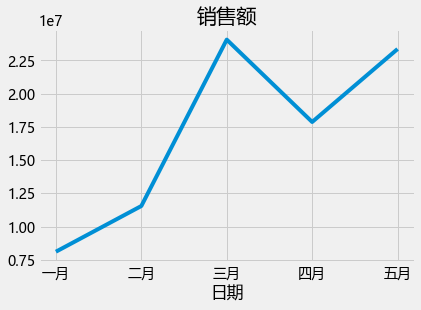

In [10]:
tb_sale.sum().plot(title='销售额')

由图推测，销售额可能存在季节波动。

按「店铺」汇总分析：

<AxesSubplot:title={'center':'销售额'}, ylabel='店铺'>

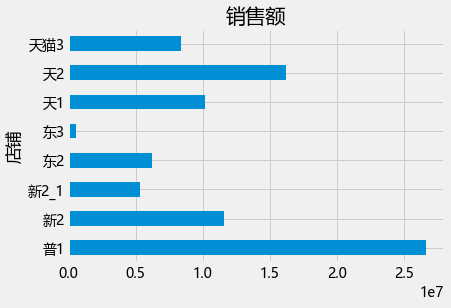

In [11]:
tb_sale.sum(axis=1).plot(kind='barh', title='销售额')

由条形图可知，不同店铺销售额存在很大的差异性。`普1` 高出其他几倍，而 `东3` 和其他有数量级的差距。

**观察「退款额」：**

In [12]:
tb_refund = pd.pivot_table(df_cleared,
                           values='店铺退款金额(元)',
                           index='店铺',
                           columns='日期',
                           aggfunc='sum')\
              .reindex(index_shop, index_month)
tb_refund

日期,一月,二月,三月,四月,五月
店铺,,,,,
普1,218477.04,556085.96,2016056.64,1568561.45,935742.11
新2,341127.47,433032.74,828508.91,470547.63,408410.51
新2_1,42914.15,46922.50,177262.45,346017.35,428051.68
东2,85500.63,96875.38,343617.14,251516.14,240904.21
东3,17155.14,10847.00,20732.00,27055.30,34898.17
天1,303031.16,229367.68,591029.10,690348.47,722476.08
天2,197424.28,177480.00,548519.32,662197.38,914581.54
天猫3,297330.40,203760.00,456864.23,285233.32,438307.14


依此类推，同样绘图分析。这里会产生大量的数据图表，为便于阅读，控制篇幅，后几个指标不再赘述。

**生成「浏览量」、「访客数」、「询单人数」和「询单→最终付款人数」数据透视表：**

为节省篇幅，以下不再展示数据。

In [13]:
# 浏览量
tb_pv = pd.pivot_table(df_cleared,
                       values='浏览量(PV)',
                       index='店铺',
                       columns='日期',
                       aggfunc='sum')\
          .reindex(index_shop, index_month)
# tb_pv

In [14]:
# 访客数
tb_uv = pd.pivot_table(df_cleared,
                       values='访客数(UV)',
                       index='店铺',
                       columns='日期',
                       aggfunc='sum')\
          .reindex(index_shop, index_month)
# tb_uv

In [15]:
# 询单人数
tb_enquire = pd.pivot_table(df_cleared,
                            values='询单人数',
                            index='店铺',
                            columns='日期',
                            aggfunc='sum')\
               .reindex(index_shop, index_month)
# tb_enquire

In [16]:
# 询单→最终付款人数
tb_enquire_ordered = pd.pivot_table(df_cleared,
                            values='询单→最终付款人数',
                            index='店铺',
                            columns='日期',
                            aggfunc='sum')\
                       .reindex(index_shop, index_month)
# tb_enquire_ordered

## 3. 业务分析

我们这里构建两个指标：
- 「**退款销售对比**」=「退款金额」/「销售金额」，反映商品和服务质量，越低越好。
- 「**询单下单比**」=「询单→最终付款人数」/「询单人数」，反映客服业务能力，越高越好。

**分析「退款销售对比」：**

In [17]:
(tb_refund/tb_sale).style.background_gradient(axis=None)

日期,一月,二月,三月,四月,五月
店铺,,,,,
普1,0.161756,0.139013,0.208031,0.247218,0.178219
新2,0.186095,0.163032,0.219485,0.421793,0.184212
新2_1,0.141635,0.150493,0.215818,0.210357,0.193526
东2,0.156764,0.133819,0.185555,0.194310,0.135577
东3,0.348866,0.089587,0.172679,0.219155,0.222256
天1,0.243874,0.161356,0.232646,0.263078,0.312027
天2,0.193404,0.149033,0.164608,0.190321,0.128102
天猫3,0.168925,0.182092,0.235541,0.229078,0.190824


我们注意到：
- 「新2」店铺「四月」退款额占比较大，将近销售金额的一半。需引起注意，进一步分析原因。
- 「东3」店铺「二月」在这个指标下表现不错。

**分析「询单下单比」：**

这里需要注意的是，表中数字有逗号分隔符，查看 `type` 属性得知部分数据需要转换为数值类型。

In [18]:
tb_enquire_ordered.applymap(type).fillna(0)

日期,一月,二月,三月,四月,五月
店铺,,,,,
普1,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
新2,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
新2_1,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
东2,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
东3,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
天1,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>
天2,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>
天猫3,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>


我们全部转换为 `int` 类型数据：

In [19]:
tb_enquire_ordered = pd.concat([
    tb_enquire_ordered[:5].apply(lambda x: x.str.replace(',', '').astype(int)),
    tb_enquire_ordered[5:].astype(int)])

此时就能进行 [Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) 运算了。

In [20]:
# 询单下单比
(tb_enquire_ordered/tb_enquire).style.background_gradient(axis=None)

日期,一月,二月,三月,四月,五月
店铺,,,,,
普1,0.271472,0.302194,0.246561,0.232526,0.262023
新2,0.237835,0.217574,0.189349,0.196067,0.205662
新2_1,0.291793,0.247379,0.210961,0.216286,0.307724
东2,0.259319,0.209156,0.202448,0.209091,0.233137
东3,0.177419,0.195266,0.100000,0.114155,0.122449
天1,0.179463,0.180122,0.185085,0.202257,0.194133
天2,0.163569,0.177966,0.161129,0.148938,0.150174
天猫3,0.226002,0.167788,0.158647,0.128076,0.130129


由热力图知：
- (普1, 二月)、(新2_1, 一月)、(新2_1, 五月) 3 组数据表现突出。
- 「东3」店铺整体表现低迷，需引起注意。

因为时间跨度不大，数据量较小，无法看出趋势，我们接下来把重点放在「**店铺**」维度上分析。

**连接数据透视表，聚合所需指标：**

In [21]:
df_metrics = pd.DataFrame([tb_sale.sum(axis=1),
                           tb_refund.sum(axis=1),
                           tb_pv.sum(axis=1),
                           tb_uv.sum(axis=1),
                           tb_enquire.sum(axis=1),
                           tb_enquire_ordered.sum(axis=1)
                           ])
df_metrics = \
df_metrics.T.reindex(index_shop).rename(columns={
                           0:'销售额', 1:'退款额',
                           2:'浏览量', 3:'访客数',
                           4:'询单人数', 5:'付款人数'})

In [22]:
# 新建指标
df_metrics['退款销售对比'] = df_metrics['退款额']/df_metrics['销售额']
df_metrics['询单下单比'] = df_metrics['付款人数']/df_metrics['询单人数']

In [23]:
# 查看指标体系
df_metrics

,销售额,退款额,浏览量,访客数,询单人数,付款人数,退款销售对比,询单下单比
店铺,,,,,,,,
普1,26637423.08,5294923.20,7453167.0,1345469.0,47175.0,12032.0,0.198778,0.255050
新2,11596650.05,2481627.26,3503570.0,742400.0,16532.0,3397.0,0.213995,0.205480
新2_1,5292895.45,1041168.13,1578866.0,349379.0,7273.0,1827.0,0.196711,0.251203
东2,6192455.15,1018413.50,2669924.0,856551.0,9053.0,1962.0,0.164460,0.216724
东3,570784.00,110687.61,287574.0,83866.0,847.0,119.0,0.193922,0.140496
天1,10144089.82,2536252.49,3040514.0,978268.0,18236.0,3470.0,0.250023,0.190283
天2,16162782.03,2500202.52,5502752.0,2017044.0,36880.0,5744.0,0.154689,0.155748
天猫3,8360827.33,1681495.09,3530882.0,1358652.0,21092.0,3248.0,0.201116,0.153992


**重新审视「退款销售对比」：**

<AxesSubplot:title={'center':'退款销售对比'}, ylabel='店铺'>

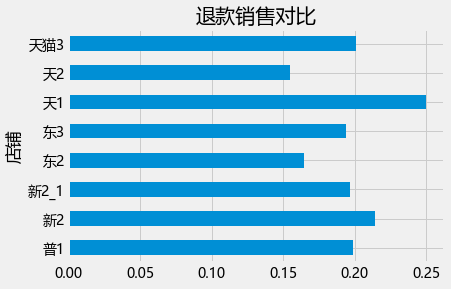

In [24]:
df_metrics['退款销售对比'].plot(kind='barh', title='退款销售对比')

由上面条形图发现：
- 各店铺「退款销售对比」相差不大，集中分布在 20% 处。

**重新审视「询单下单比」：**

<AxesSubplot:title={'center':'询单下单比'}, ylabel='店铺'>

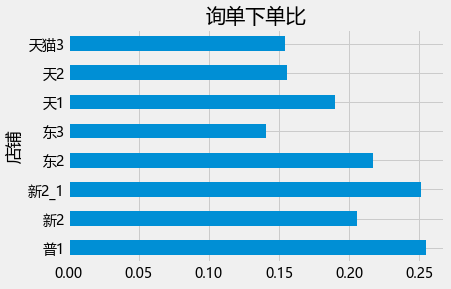

In [25]:
df_metrics['询单下单比'].plot(kind='barh', title='询单下单比')

由上面条形图发现：
- 各店铺「询单下单比」有较明显的差异性，反映出了售前能力的参差不齐。

**最后，让我们看一下各个指标之间的相关性：**

In [26]:
df_metrics.corr().style.background_gradient(cmap='RdBu_r')

,销售额,退款额,浏览量,访客数,询单人数,付款人数,退款销售对比,询单下单比
销售额,1.000000,0.975534,0.976986,0.687556,0.963478,0.983921,-0.029166,0.408982
退款额,0.975534,1.000000,0.926748,0.584083,0.908281,0.964679,0.181976,0.458388
浏览量,0.976986,0.926748,1.000000,0.811190,0.981794,0.950727,-0.142096,0.305960
访客数,0.687556,0.584083,0.811190,1.000000,0.829359,0.622065,-0.310411,-0.137516
询单人数,0.963478,0.908281,0.981794,0.829359,1.000000,0.946016,-0.124643,0.207151
付款人数,0.983921,0.964679,0.950727,0.622065,0.946016,1.000000,-0.029722,0.433831
退款销售对比,-0.029166,0.181976,-0.142096,-0.310411,-0.124643,-0.029722,1.000000,0.108205
询单下单比,0.408982,0.458388,0.305960,-0.137516,0.207151,0.433831,0.108205,1.000000


限于时间和篇幅，就暂时到这里了。  
匆匆停笔，还请见谅。

Thanks for reading ;)